In [ ]:
# Checkpoint 2
## Abhinav Akinapalli, Nathan James, Laila Shakoor, Amy Tan

# Data Pre-Processing

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [57]:
df = pd.read_csv("health-risk-prediction-anonymized-real-data/Health_Risk_Dataset.csv")
df.head()

Patient_ID  Respiratory_Rate  Oxygen_Saturation  O2_Scale  Systolic_BP  \
0      P0522                25                 96         1           97   
1      P0738                28                 92         2          116   
2      P0741                29                 91         1           79   
3      P0661                24                 96         1           95   
4      P0412                20                 96         1           97   

   Heart_Rate  Temperature Consciousness  On_Oxygen Risk_Level  
0         107         37.5             A          0     Medium  
1         151         38.5             P          1       High  
2         135         38.4             A          0       High  
3          92         37.3             A          0     Medium  
4          97         37.4             A          0        Low

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient_ID         1000 non-null   object 
 1   Respiratory_Rate   1000 non-null   int64  
 2   Oxygen_Saturation  1000 non-null   int64  
 3   O2_Scale           1000 non-null   int64  
 4   Systolic_BP        1000 non-null   int64  
 5   Heart_Rate         1000 non-null   int64  
 6   Temperature        1000 non-null   float64
 7   Consciousness      1000 non-null   object 
 8   On_Oxygen          1000 non-null   int64  
 9   Risk_Level         1000 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 78.3+ KB


In [61]:
df.describe()

Respiratory_Rate  Oxygen_Saturation     O2_Scale  Systolic_BP  \
count       1000.000000         1000.00000  1000.000000  1000.000000   
mean          21.511000           92.59000     1.124000   106.160000   
std            5.287517            4.47302     0.329746    17.897562   
min           12.000000           74.00000     1.000000    50.000000   
25%           17.000000           90.00000     1.000000    94.000000   
50%           20.000000           94.00000     1.000000   109.000000   
75%           25.000000           96.00000     1.000000   119.000000   
max           40.000000          100.00000     2.000000   146.000000   

        Heart_Rate  Temperature    On_Oxygen  
count  1000.000000  1000.000000  1000.000000  
mean     98.460000    37.921000     0.274000  
std      19.694626     1.113696     0.446232  
min      60.000000    35.600000     0.000000  
25%      84.000000    37.100000     0.000000  
50%      95.500000    37.800000     0.000000  
75%     109.000000    38.600000     1.000000  
max     163.000000    41.800000     1.000000

In [63]:
# Pre-processing: Converting PatientID to String; Consciousness, On_Oxygen, and Risk_Level to category
df["Patient_ID"] = df["Patient_ID"].astype("string")
df["O2_Scale"] = df["O2_Scale"].astype("category")
df["Consciousness"] = df["Consciousness"].astype("category")
df["On_Oxygen"] = df["On_Oxygen"].astype("category")
df["Risk_Level"] = df["Risk_Level"].astype("category")

# Z-Test for Outliers

Question: Are there extreme outliers (z-score greater than 3) in the continuous features of our Health Risk Prediction dataset?

In [71]:
continuous_features = ['Respiratory_Rate', 'Oxygen_Saturation', 'Systolic_BP',
            'Heart_Rate', 'Temperature']

for col in continuous_features:
    z = (df[col] - df[col].mean()) / df[col].std()
    df[f'{col}_Z'] = z
    outliers = df[np.abs(z) > 3]
    print(f"\n{col}: {len(outliers)} outliers")


Respiratory_Rate: 2 outliers

Oxygen_Saturation: 8 outliers

Systolic_BP: 2 outliers

Heart_Rate: 4 outliers

Temperature: 6 outliers


# Visualization

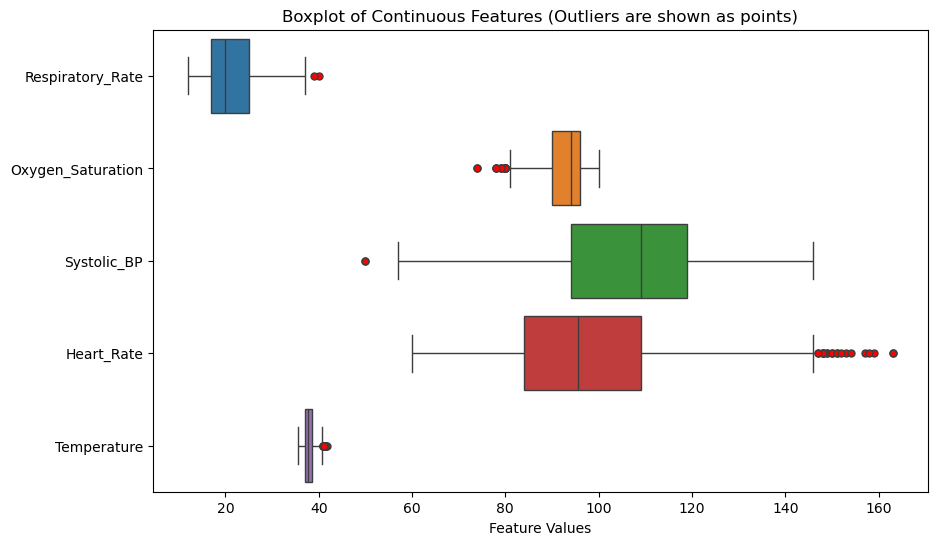

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[continuous_features], orient='h', flierprops={'marker': 'o', 'markersize': 5, 'markerfacecolor': 'red'})
plt.title("Boxplot of Continuous Features (Outliers are shown as points)")
plt.xlabel("Feature Values")
plt.show()

# Conclusion 1:

There are 2-8 outliers (z-score greater than 3) in each continuous column of the dataset.

# T-Test Design for Oxygen Saturation

**Research Question**: Does being on supplemental oxygen ("On_Oxygen") significantly affect patients' mean oxygen saturation?

**Groups:**
- Group 1 (0): Not on oxygen
- Group 2 (1): On oxygen
  
**Variable**: Oxygen_Saturation

# Hypotheses

- **Null Hypothesis**: There is no difference in mean oxygen saturation between patients on oxygen vs. those not on oxygen.
- **Alternative Hypothesis**: Being on supplemental oxygen changes the mean oxygen saturation between the two groups.
This is a two-sample, two-tailed t-test.

# Assumptions

- Independence: Each pateint is unique.
- Normality: With n approximately 1000, CLT supports near-normal mean distribution.

T-statistic = -11.896, p-value = 0.000000000000000000000000000421


<Axes: xlabel='On_Oxygen', ylabel='Oxygen_Saturation'>

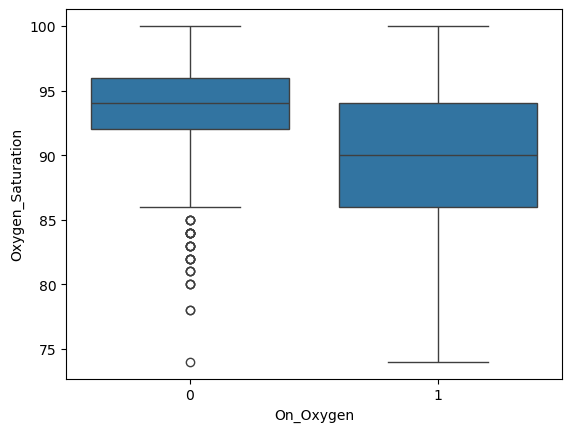

In [79]:
df = pd.read_csv("health-risk-prediction-anonymized-real-data/Health_Risk_Dataset.csv")

group_on = df[df['On_Oxygen'] == 1]['Oxygen_Saturation']
group_off = df[df['On_Oxygen'] == 0]['Oxygen_Saturation']

t_stat, p_val = stats.ttest_ind(group_on, group_off, equal_var=False)

print(f"T-statistic = {t_stat:.3f}, p-value = {p_val:.30f}")

sns.boxplot(x="On_Oxygen", y="Oxygen_Saturation", data=df)

# Conclusion 2: 

In [ ]:
Since p < 0.005: We reject the Null Hypothesis. Thus, Oxygen therapy is associated with different mean oxygen saturation.

Note: There were multiple outliers found in the non-oxygenated group, with many of them having uncommonly high oxygen saturations pre-oxygen therapy.

# ANOVA Test for Respiratory Rate On Risk Level

**Question**:
Is there a difference in the respiratory rates in each risk category?

**Null Hypothesis**:
There is no difference in respiratory rates between risk categories.

**Alternate Hypothesis**:
There is a statisically significant difference in respiratory rates among risk categories.

In [81]:
groups = df.groupby("Risk_Level")
new_groups = [group["Respiratory_Rate"].values for name, group in groups]
f_stat, p_val = stats.f_oneway(*new_groups)
print(f"ANOVA F-statistic: {f_stat}, p-value: {p_val}")

ANOVA F-statistic: 724.3706495626739, p-value: 9.680624282634389e-250


# Post Hoc Analysis

In [83]:
tukey = pairwise_tukeyhsd(endog=df["Respiratory_Rate"], groups=df["Risk_Level"], alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
  High    Low  -9.5003   0.0 -10.1621  -8.8384   True
  High Medium   -7.031   0.0  -7.6634  -6.3986   True
  High Normal -12.0804   0.0  -12.838 -11.3228   True
   Low Medium   2.4693   0.0   1.8215    3.117   True
   Low Normal  -2.5801   0.0  -3.3506  -1.8097   True
Medium Normal  -5.0494   0.0  -5.7947  -4.3041   True
-----------------------------------------------------


# Visualization

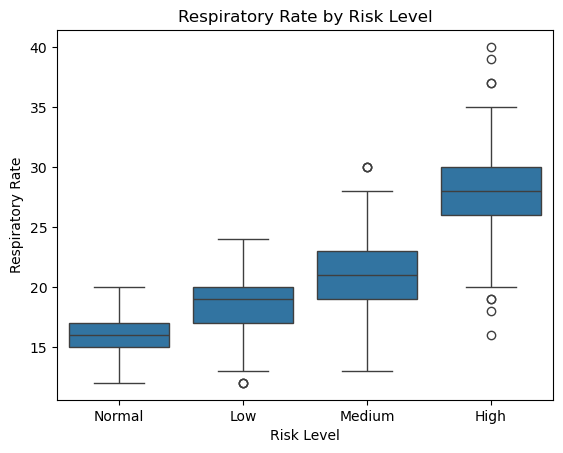

In [85]:
sns.boxplot(x="Risk_Level", y="Respiratory_Rate", data=df, order=["Normal", "Low", "Medium", "High"])
plt.xlabel("Risk Level")
plt.ylabel("Respiratory Rate")
plt.title("Respiratory Rate by Risk Level")
plt.show()

# Analysis

After running a one-way ANOVA on respiratory rates against risk levels, it was found that at least one mean is statistically different among the groups with a p-value less than 0.05. To further investigate this, a post hoc Tukey's HSD was run and determined a relationship such that respiratory rates increase in the following order: normal, low, medium, high. This indicates that each level increase like low to medium, corresponds with an increase in respiratory rate. The data contains outliers with the low, medium, and high levels. However, the data still trends in the direction that an increase in respiratory rate corresponds with an increase in risk level.